### Chapter 3 
### Classification
Get MNIST

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    print('Import Error')

Count group by digits 

In [16]:
len(mnist.target)
for i in range(0,10):
    print ( i, list(mnist.target).count(i))

0 6903
1 7877
2 6990
3 7141
4 6824
5 6313
6 6876
7 7293
8 6825
9 6958


MNIST data arrays

In [18]:
X, y = mnist['data'], mnist['target']
X.shape


(70000, 784)

In [19]:
y.shape

(70000,)

In [99]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

#### Display Images - One at a time and 100 at a time.

 40000


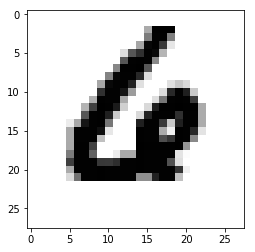

6


In [42]:
index = int(input())
some_digit = X[index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation  = 'nearest')
#plt.axis('off')
plt.show()
print(y[index])

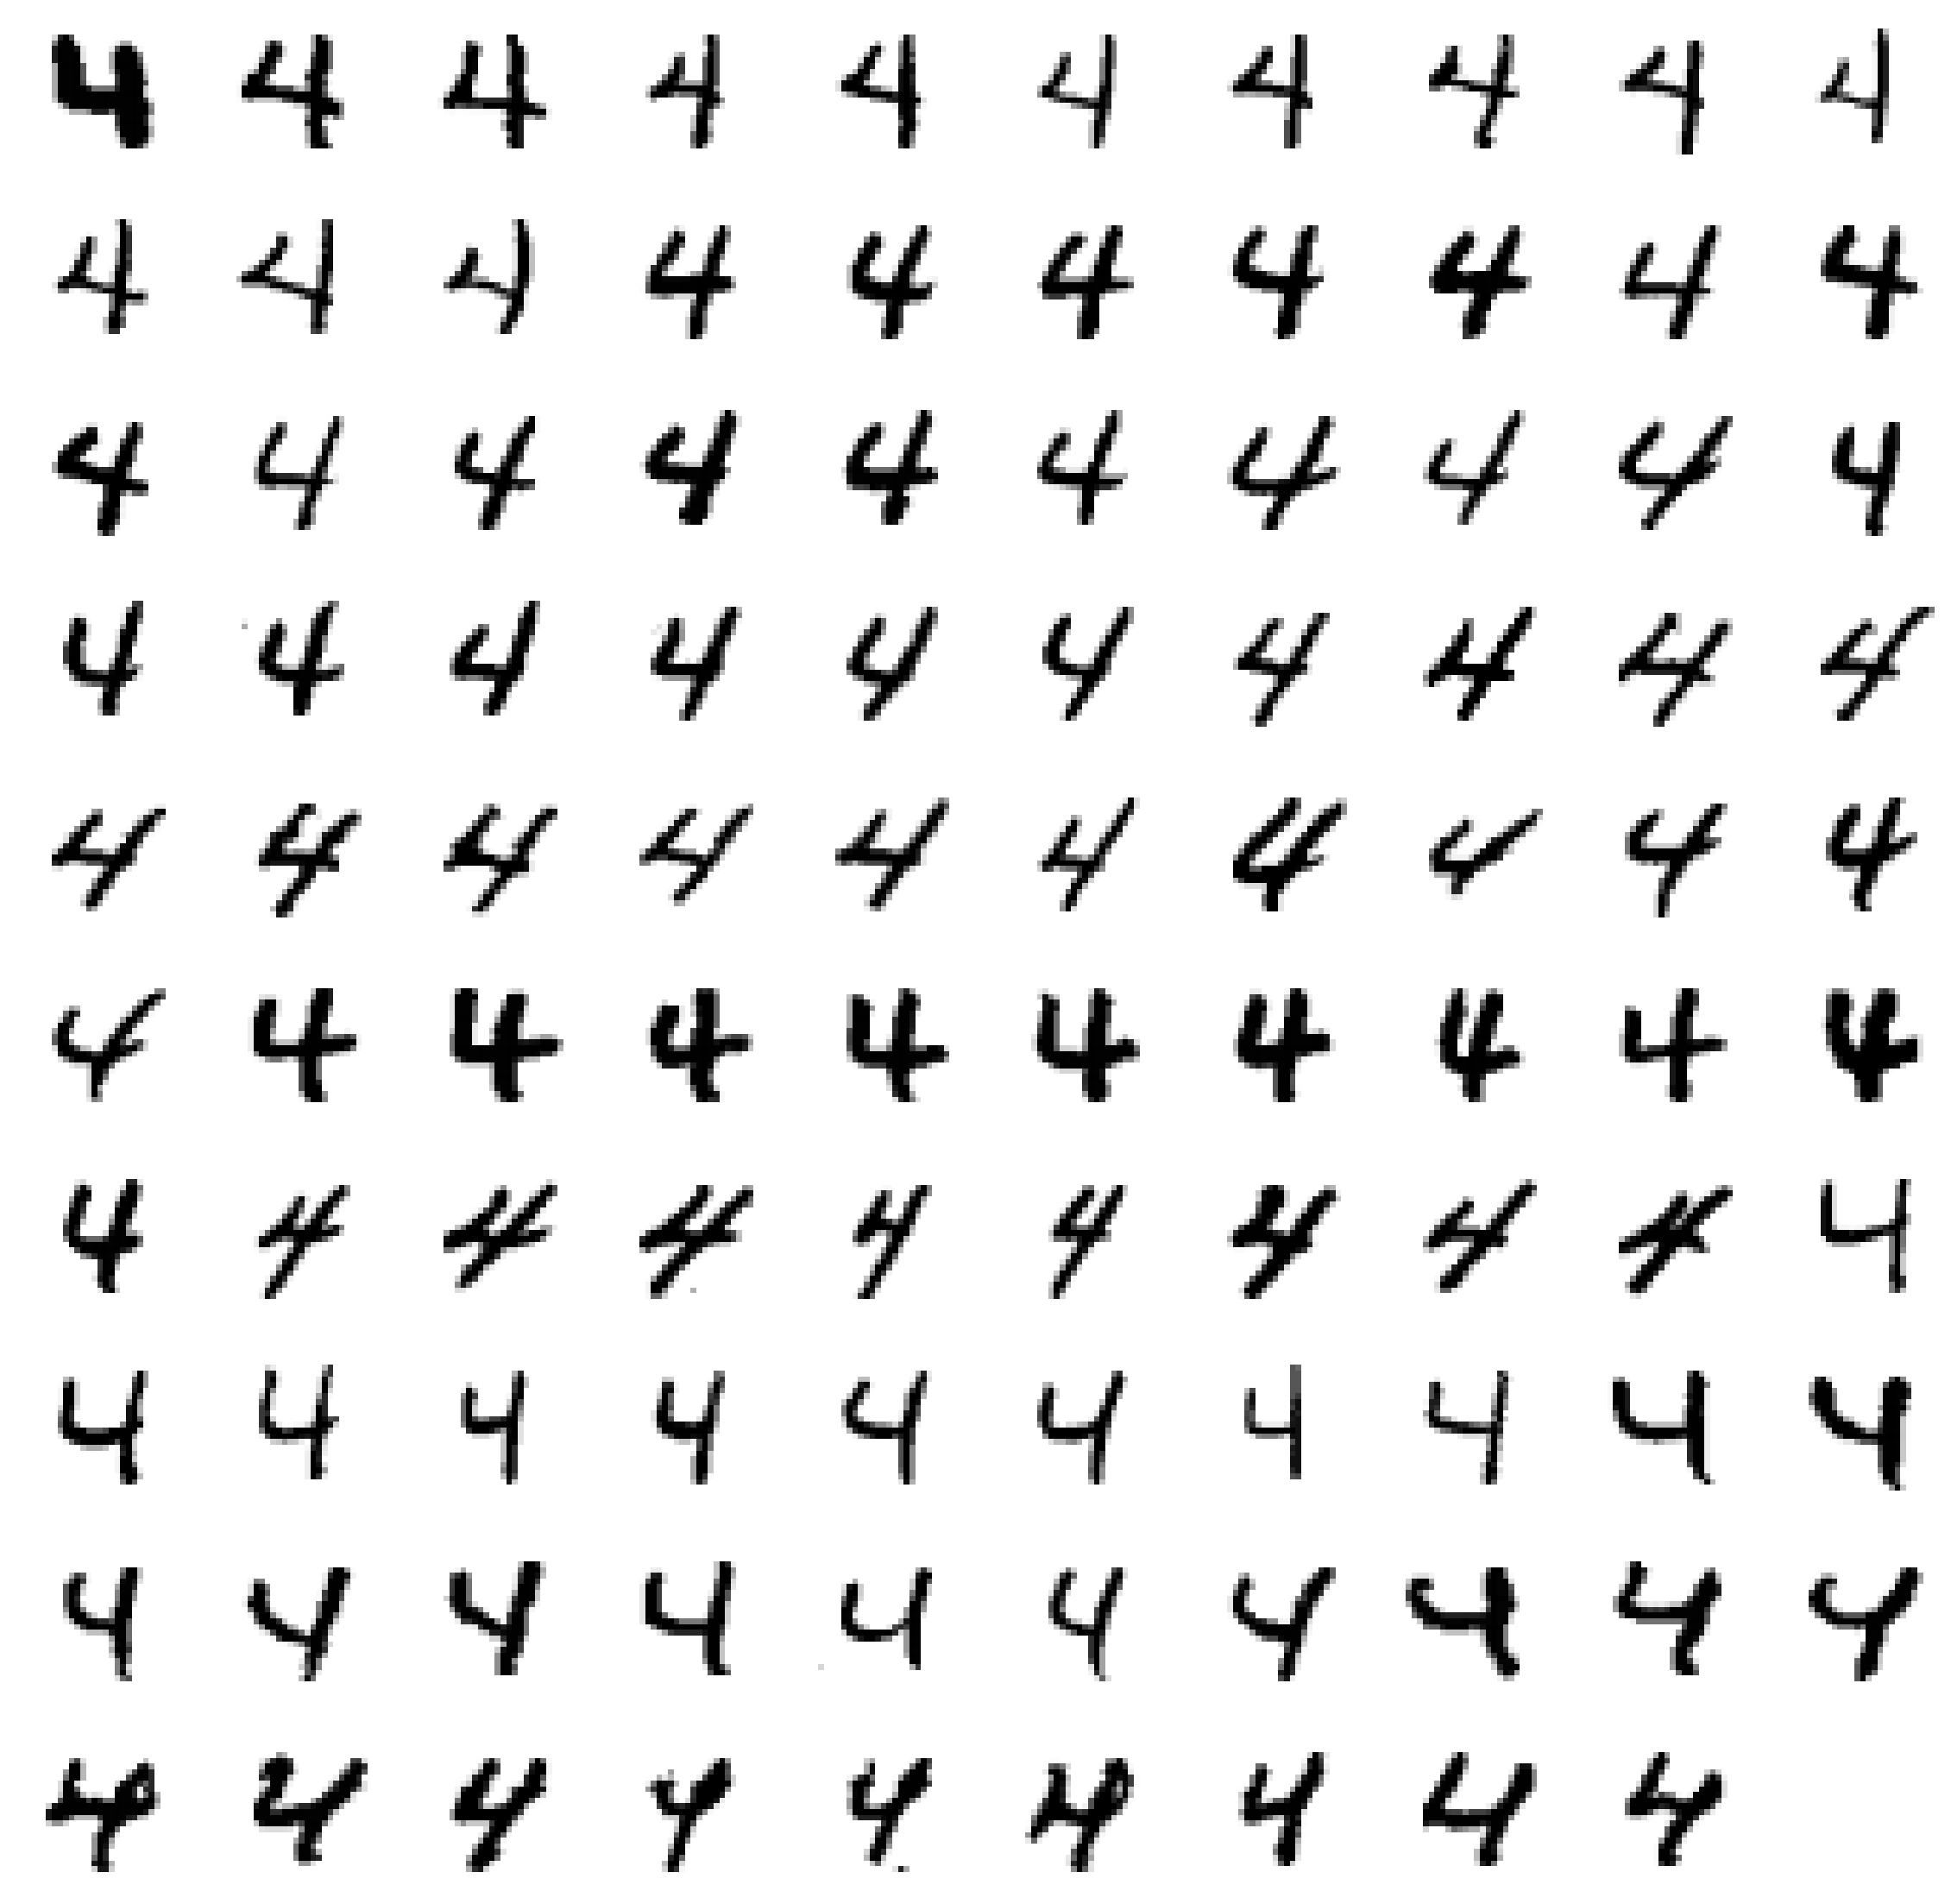

In [75]:
fig=plt.figure(figsize=(40, 40))
offset = 65000
for index in range (offset+1,offset+100):
    some_digit = X [index]
    some_digit_image = some_digit.reshape(28,28)
    fig.add_subplot(10, 10, index-offset)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation  = 'nearest')
    plt.axis('off')
plt.show()  

### Splitting into train and test set.

In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle the data

In [56]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

### Training the Binary Classifier (Stochastic Gradient Descent)

In [60]:
len(y_train)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [62]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
sgd_clf.predict([X[65000],X[65002]])

array([False, False])

#### Performance Measure of Binary Classifier

In [79]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5 , scoring='accuracy')

array([0.9624198 , 0.96533333, 0.953     , 0.955     , 0.96808067])

Never5Classifier Example

In [90]:
np.zeros((len(X[65000]),1), dtype=bool)

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)


In [91]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')


array([0.9098 , 0.90955, 0.9096 ])

### Confusion Matrix
* Question What does clean prediction mean here.

In [95]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 )

confusion_matrix(y_train_5, y_train_pred)

array([[53259,  1320],
       [ 1473,  3948]])

In [97]:
precision_score(y_train_5, y_train_pred)

0.7494305239179955

In [98]:
recall_score(y_train_5, y_train_pred)

0.728278915329275

In [100]:
f1_score(y_train_5, y_train_pred)

0.7387033398821218

#### Precesion Recall curve

In [102]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3 , method = 'decision_function')

In [104]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve(y_train_5, y_scores)

In [109]:
def plot_precesion_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

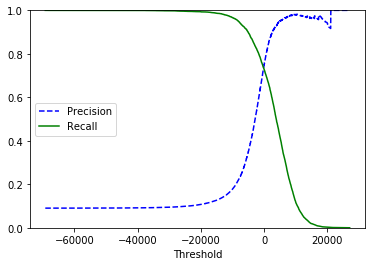

In [110]:
plot_precesion_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()